In [2]:
import xarray as xr
import numpy as np
import pandas as pd

projdir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'
out_dir = projdir + 'sm_droughts/'

PmEQ_drght_files = 'PmEQ_events_*.nc'
sm_drght_files = 'sm_events_*.nc'

ds_PmEQ = xr.open_mfdataset(out_dir + PmEQ_drght_files)
ds_sm = xr.open_mfdataset(out_dir + sm_drght_files)

In [3]:
ds_PmEQ

<xarray.Dataset>
Dimensions:    (lat: 141, lon: 261, time: 40178, timescale: 3)
Coordinates:
  * lat        (lat) float32 -32.0 -32.05 -32.1 -32.15 ... -38.9 -38.95 -39.0
  * lon        (lon) float32 139.0 139.1 139.1 139.1 ... 151.9 151.9 151.9 152.0
    quantile   float64 0.3
  * time       (time) datetime64[ns] 1911-01-01 1911-01-02 ... 2020-12-31
    dayofyear  (time) int64 dask.array<chunksize=(3653,), meta=np.ndarray>
    parameter  <U4 'PmEQ'
  * timescale  (timescale) int64 2 6 12
Data variables:
    PminusEQ   (timescale, time, lat, lon) float64 dask.array<chunksize=(3, 3653, 141, 261), meta=np.ndarray>

In [4]:
ds_sm

<xarray.Dataset>
Dimensions:     (lat: 141, lon: 261, time: 40178)
Coordinates:
  * lat         (lat) float32 -32.0 -32.05 -32.1 -32.15 ... -38.9 -38.95 -39.0
  * lon         (lon) float32 139.0 139.1 139.1 139.1 ... 151.9 151.9 152.0
    quantile    float64 0.3
  * time        (time) datetime64[ns] 1911-01-01 1911-01-02 ... 2020-12-31
    dayofyear   (time) int64 dask.array<chunksize=(3653,), meta=np.ndarray>
Data variables:
    sm_deficit  (time, lat, lon) float64 dask.array<chunksize=(3653, 141, 261), meta=np.ndarray>

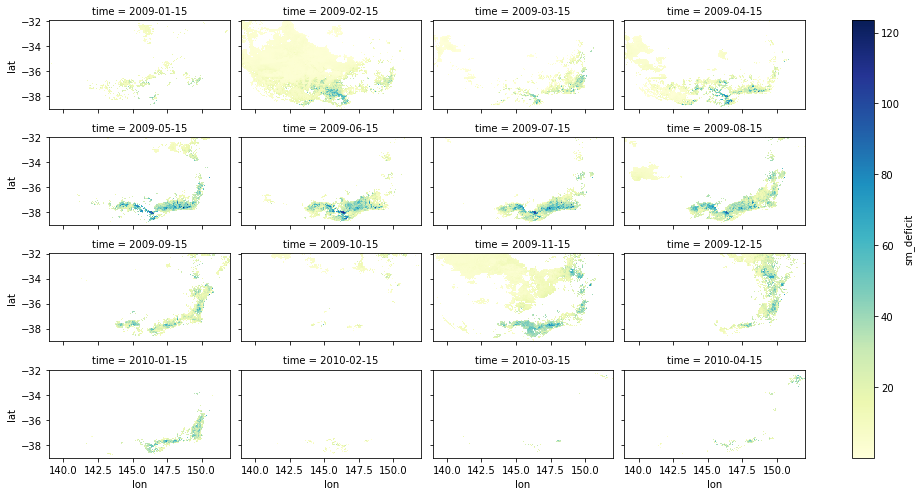

In [7]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/'

yr_sel = '2009'
yr_sel2 = '2010'
d_sel = '15'

figname = 'millennium_drought_' + yr_sel + '_' + yr_sel2 + '_day' + d_sel + '_sm_deficit.png'
time_sel = [yr_sel + m + d_sel for m in ['-01-', '-02-', '-03-', '-04-', '-05-', '-06-', \
            '-07-', '-08-', '-09-', '-10-', '-11-', '-12-']]
time_sel.extend([yr_sel2 + m + d_sel for m in ['-01-', '-02-', '-03-', '-04-']])

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size
ds_sm['sm_deficit'].sel(time = time_sel).plot(x = "lon", y = "lat", col = "time", col_wrap = 4, cmap = "YlGnBu", aspect = aspect, size = 1.75)
plt.savefig(outdir + figname)

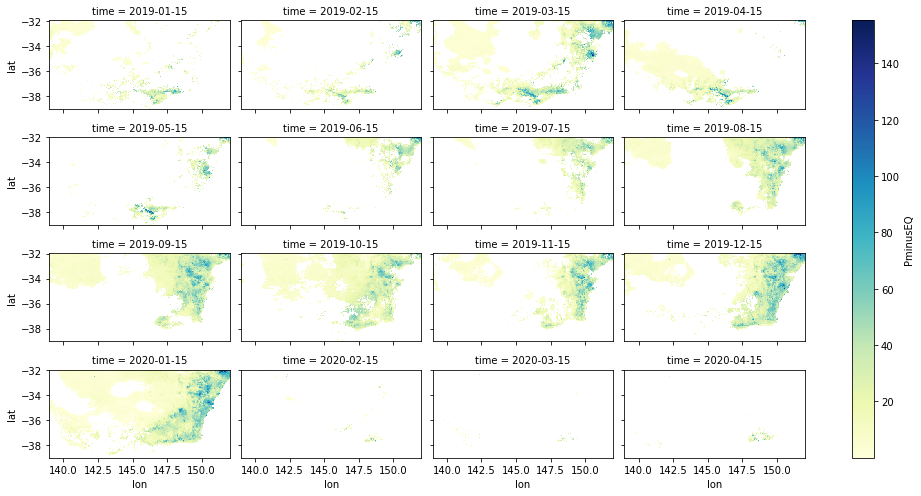

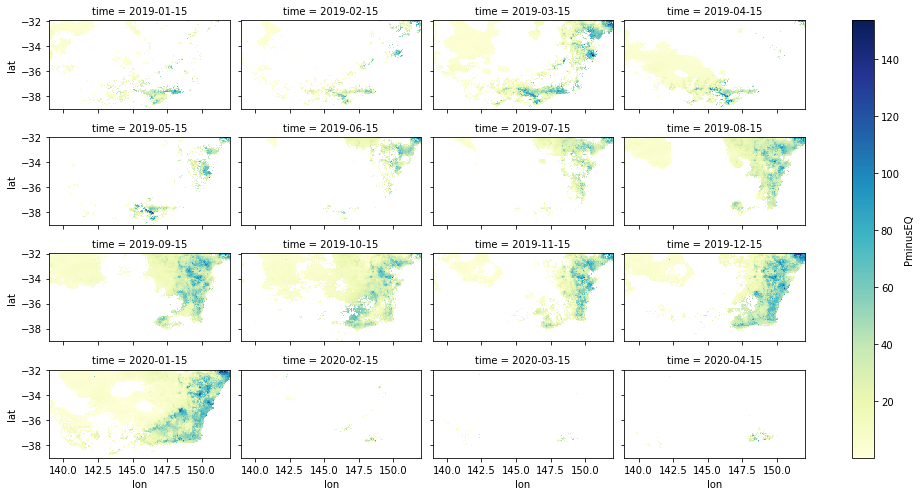

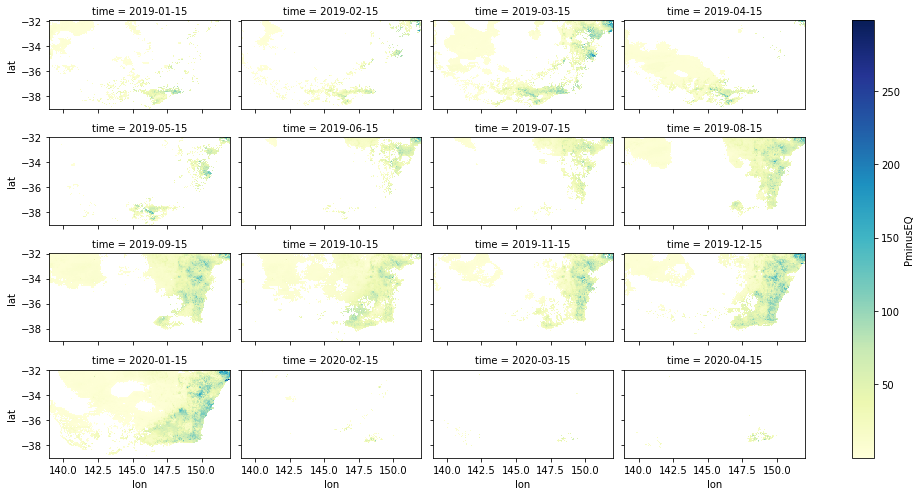

In [13]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/'

yr_sel = '2019'
yr_sel2 = '2020'
d_sel = '15'

for ts in ds_PmEQ['timescale'].values:
    figname = 'recent_drought_' + yr_sel + '_' + yr_sel2 + '_day' + d_sel + '_PminusEQ_' + str(ts) + '_weeks.png'
    time_sel = [yr_sel + m + d_sel for m in ['-01-', '-02-', '-03-', '-04-', '-05-', '-06-', \
                '-07-', '-08-', '-09-', '-10-', '-11-', '-12-']]
    time_sel.extend([yr_sel2 + m + d_sel for m in ['-01-', '-02-', '-03-', '-04-']])

    lat_size = -32-(-39)
    lon_size = 152-139
    aspect = lon_size/lat_size
    ds_PmEQ['PminusEQ'].sel(time = time_sel, timescale = ts).plot(x = "lon", y = "lat", col = "time", col_wrap = 4, cmap = "YlGnBu", aspect = aspect, size = 1.75)
    plt.savefig(outdir + figname)

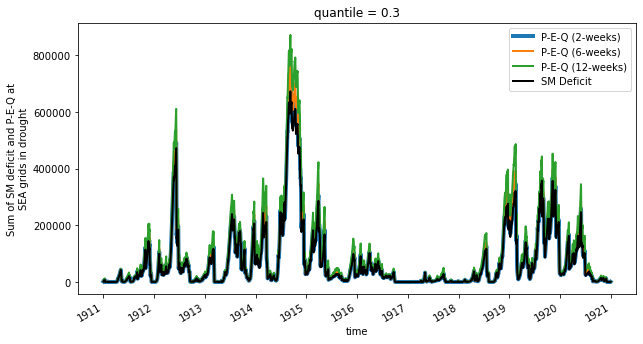

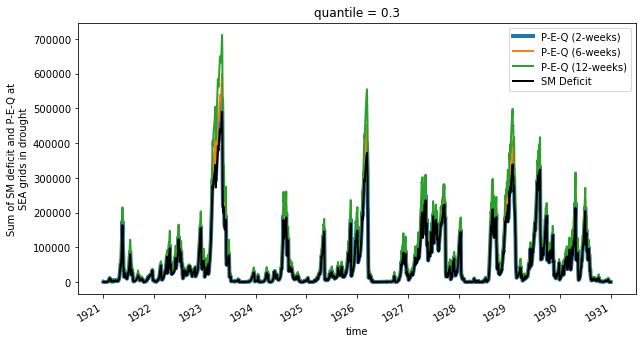

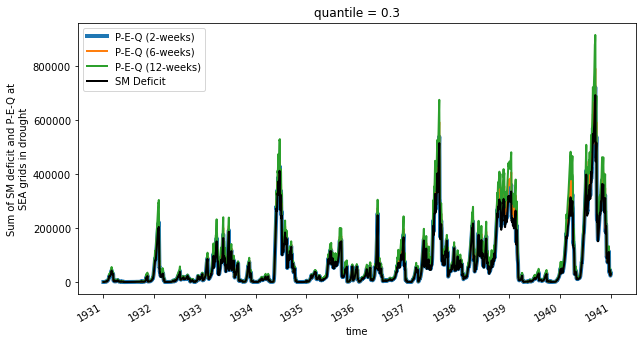

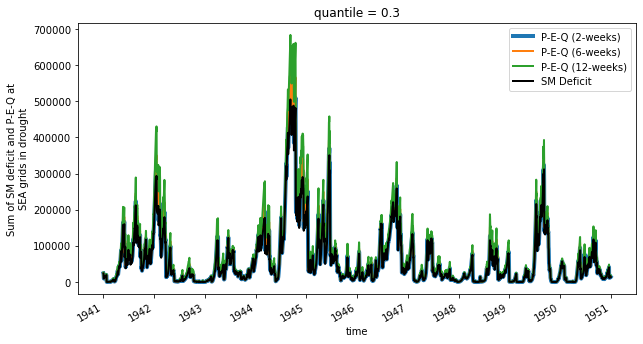

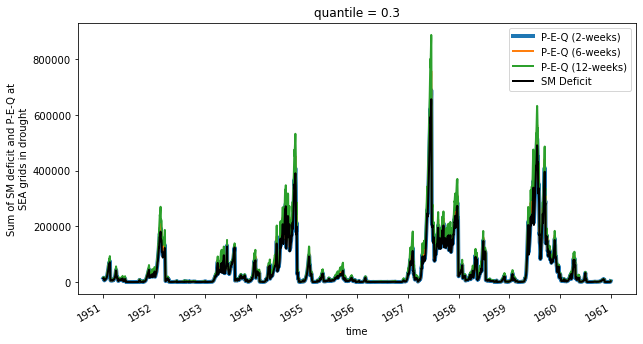

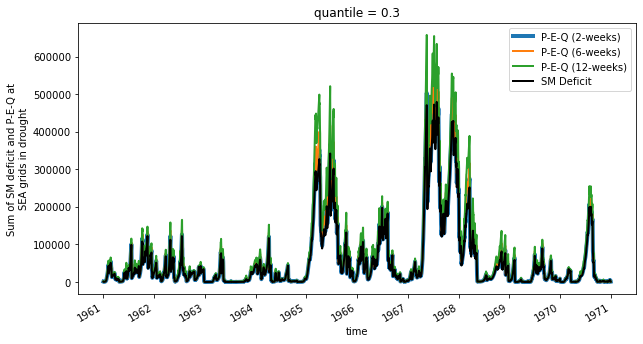

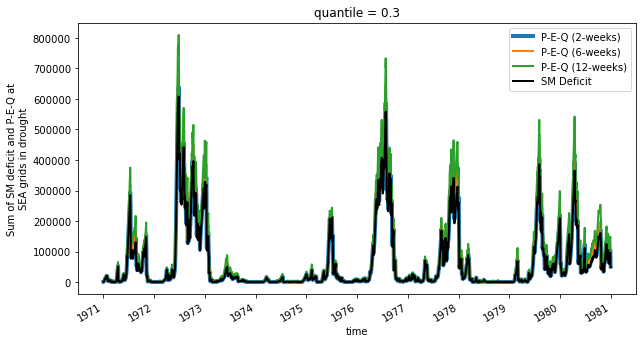

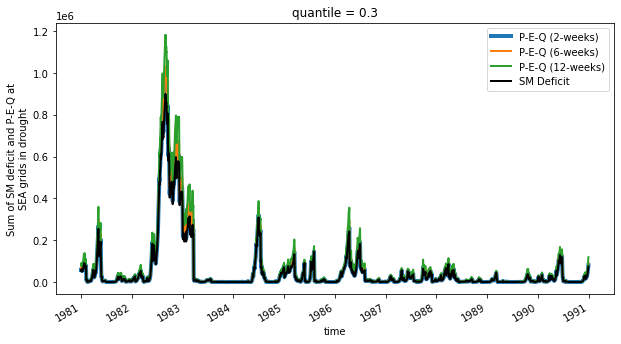

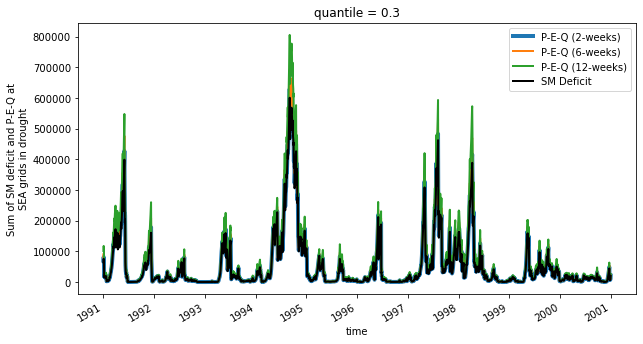

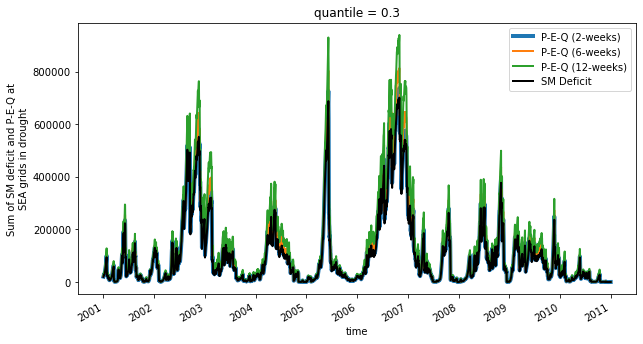

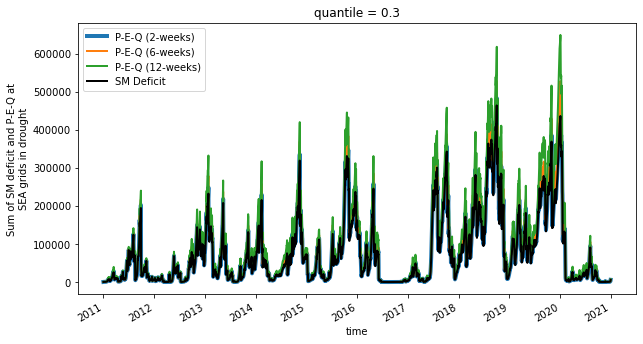

In [20]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/'
for styr in range(1911, 2020, 10):
    enyr = styr + 9
    timeslice = slice(str(styr) + '-01-01', str(enyr) + '-12-31')
    ds_PmEQ['PminusEQ'].sel(timescale = 2, time = timeslice).sum(['lat', 'lon']).rename('Sum of SM deficit and P-E-Q at SEA grids in drought').plot(size=5, aspect=2, label = 'P-E-Q (2-weeks)', linewidth=4) #, linewidth=2, label='P-E-Q')
    ds_PmEQ['PminusEQ'].sel(timescale = 6, time = timeslice).sum(['lat', 'lon']).rename('Sum of SM deficit and P-E-Q at SEA grids in drought').plot(label = 'P-E-Q (6-weeks)', linewidth=2)
    ds_PmEQ['PminusEQ'].sel(timescale = 12, time = timeslice).sum(['lat', 'lon']).rename('Sum of SM deficit and P-E-Q at SEA grids in drought').plot(label = 'P-E-Q (12-weeks)', linewidth=2)
    ds_sm['sm_deficit'].sel(time = timeslice).sum(['lat', 'lon']).rename('Sum of SM deficit and P-E-Q at SEA grids in drought').plot(label = 'SM Deficit', linewidth=2,color="black") #size=5, aspect=3) #, label = 'SM Deficit')
    plt.legend()
    plt.savefig(outdir + 'sm_moisture_accum_to_break_drought_diffTs_' + str(styr) + '_' + str(enyr) + '.png')

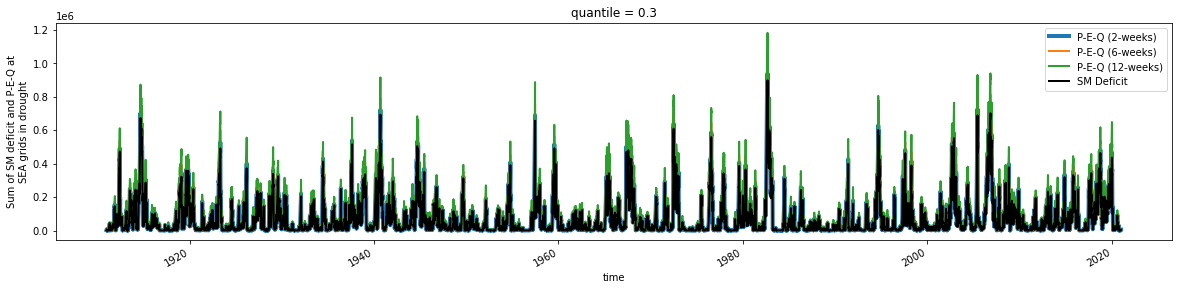

In [23]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/'
styr = 1911
enyr = 2020
timeslice = slice(str(styr) + '-01-01', str(enyr) + '-12-31')
ds_PmEQ['PminusEQ'].sel(timescale = 2, time = timeslice).sum(['lat', 'lon']).rename('Sum of SM deficit and P-E-Q at SEA grids in drought').plot(size=4, aspect=5, label = 'P-E-Q (2-weeks)', linewidth=4) #, linewidth=2, label='P-E-Q')
ds_PmEQ['PminusEQ'].sel(timescale = 6, time = timeslice).sum(['lat', 'lon']).rename('Sum of SM deficit and P-E-Q at SEA grids in drought').plot(label = 'P-E-Q (6-weeks)', linewidth=2)
ds_PmEQ['PminusEQ'].sel(timescale = 12, time = timeslice).sum(['lat', 'lon']).rename('Sum of SM deficit and P-E-Q at SEA grids in drought').plot(label = 'P-E-Q (12-weeks)', linewidth=2)
ds_sm['sm_deficit'].sel(time = timeslice).sum(['lat', 'lon']).rename('Sum of SM deficit and P-E-Q at SEA grids in drought').plot(label = 'SM Deficit', linewidth=2,color="black") #size=5, aspect=3) #, label = 'SM Deficit')
plt.legend()
plt.savefig(outdir + 'sm_moisture_accum_to_break_drought_diffTs_' + str(styr) + '_' + str(enyr) + '.png')